In [145]:
import numpy as np
import os
import tensorflow as tf
from tensorflow_graph_in_jupyter import show_graph
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [109]:
# resetting the graph
def reset_graph(seed = 42):
    tf.reset_default_graph()
    # setting random seeds
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [15]:
# this function saves the figures
def save_fig(fig_id,tight_layout = True):
    path = os.path.join("images",fig_id+".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = "png", dpi = 300)

In [3]:
# loading iris dataset
iris = load_iris()

In [6]:
X = iris.data[:,(2,3)] # extracting Petal length and Petal width as features
y = (iris.target == 0).astype(int) # binary classifier to classify iris setosa vs others

# Perceptrons

In [16]:
# initializing and fitting perceptron model
per_clf = Perceptron(max_iter = 100, tol = -np.infty, random_state = 42)
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

# Decision Boundary: w1x1 + w2x2 + w0 = 0
# => x2 = -w1/w2*x1 -w0/w2

In [62]:
# computing the decision boundary based on the results
a = -per_clf.coef_[0][0]/per_clf.coef_[0][1] # -w1/w2
b = -per_clf.intercept_/per_clf.coef_[0][1] # -w0/w2

In [63]:
axes = [0 , 5, 0, 2] # x and y-axes sizes

# np.linspace -> returns evenly spaced numbers over a specified interval
# np.meshgrid -> returns a N-dimensional coordinate vectors from 1-D arrays

In [64]:
# creating a 2D grid by generating 200 * 500 random points
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1,1),
        np.linspace(axes[2], axes[3], 200).reshape(-1,1),
)

In [65]:
X_new = np.c_[x0.ravel(), x1.ravel()] # 100000 points
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

<function matplotlib.pyplot.show(*args, **kw)>

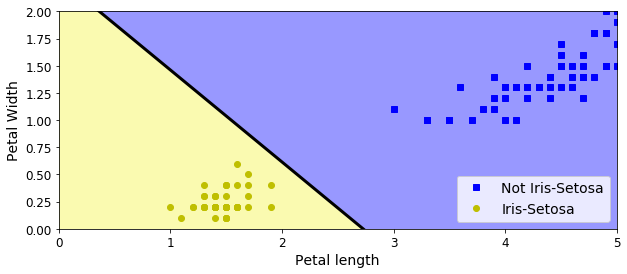

In [70]:
# plotting the original Iris data set points
plt.figure(figsize = (10,4))
plt.plot(X[y==0,0], X[y==0,1], "bs", label = "Not Iris-Setosa")
plt.plot(X[y==1,0], X[y==1,1], "yo", label = "Iris-Setosa")

# plotting the decision boundary
plt.plot([axes[0],axes[1]], [a*axes[0] + b, a*axes[1] + b], "k-",linewidth = 3)

# plotting the contours (filled)
custom_cmap = ListedColormap(['#9898ff','#fafab0'])
plt.contourf(x0, x1,zz, cmap = custom_cmap)
plt.xlabel("Petal length",fontsize = 14)
plt.ylabel("Petal Width", fontsize = 14)
plt.legend(loc="lower right",fontsize = 14)
plt.axis(axes)
plt.show

# DNN for MNIST -> Using the Estimator API (high-level API)

In [88]:
# loading MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [89]:
# Converting a 28*28 matrix of inputs into 784-sized vectors
X_train = X_train.astype(np.float32).reshape(-1, 28*28)/255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28)/255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [90]:
#splitting the training test into validation set (50%)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [99]:
# initiating a numeric feature vector
feature_cols = [tf.feature_column.numeric_column("X", shape = [28 * 28])]

In [102]:
# initializing a DNN classifier with two hidden layers with ReLU activation and a softmax output layer
dnn_clf = tf.estimator.DNNClassifier(hidden_units = [300, 100], n_classes = 10, feature_columns = feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/44/_6c30mbx2b9_w8y1w6y444d8hj8shc/T/tmpp_6yh7cf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1162eae10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [103]:
# training the DNN classifier on the training set using batch size = 50
input_fn = tf.estimator.inputs.numpy_input_fn( x = {"X": X_train}, y = y_train, num_epochs = 40, batch_size = 50, shuffle = True )
dnn_clf.train(input_fn = input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/44/_6c30mbx2b9_w8y1w6y444d8hj8shc/T/tmpp_6yh7cf/model.ckpt.
INFO:tensorflow:loss = 117.28941, step = 1
INFO:tensorflow:global_step/sec: 472.665
INFO:tensorflow:loss = 7.3136215, step = 101 (0.212 sec)
INFO:tensorflow:global_step/sec: 563.676
INFO:tensorflow:loss = 23.440786, step = 201 (0.177 sec)
INFO:tensorflow:global_step/sec: 567.125
INFO:tensorflow:loss = 8.084043, step = 301 (0.177 sec)
INFO:tensorflow:global_step/sec: 583.475
INFO:tensorflow:loss = 9.659691, step = 401 (0.171 sec)
INFO:tensorflow:global_step/sec: 374.224
INFO:tensorflow:loss = 4.9239197, step = 501 (0.269 sec)
INFO:tensorflow:global_step/sec: 342.622
INFO:tensorflow:loss = 4.534344, step = 601 (0.290 sec)
INFO:tensorflow:

In [105]:
# evaluating on the test set
test_input_fn = tf.estimator.inputs.numpy_input_fn(x = {"X": X_test}, y = y_test, shuffle = True)
eval_results = dnn_clf.evaluate(input_fn = test_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-28-15:02:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/44/_6c30mbx2b9_w8y1w6y444d8hj8shc/T/tmpp_6yh7cf/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-28-15:02:44
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.982, average_loss = 0.09561286, global_step = 44000, loss = 12.102894
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/44/_6c30mbx2b9_w8y1w6y444d8hj8shc/T/tmpp_6yh7cf/model.ckpt-44000
{'accuracy': 0.982, 'average_loss': 0.09561286, 'loss': 12.102894, 'global_step': 44000}


In [106]:
# Predictions
y_pred = dnn_clf.predict(input_fn = test_input_fn)
y_pred = list(y_pred)
print(y_pred[0])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/44/_6c30mbx2b9_w8y1w6y444d8hj8shc/T/tmpp_6yh7cf/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([-13.222946 ,  -2.430775 , -27.517931 ,  11.204188 , -29.422968 ,
        41.493805 ,   3.4329848, -22.791544 ,   2.4602911,   6.46117  ],
      dtype=float32), 'probabilities': array([1.72511061e-24, 8.39068555e-20, 1.06803320e-30, 7.00466025e-14,
       1.58941647e-31, 1.00000000e+00, 2.95389638e-17, 1.20567018e-28,
       1.11676314e-17, 6.10267227e-16], dtype=float32), 'class_ids': array([5]), 'classes': array([b'5'], dtype=object)}


# using Plain Tensorflow -> lower-level API

In [107]:
# input parameters
n_inputs = 28*28 # input size
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [111]:
reset_graph()
# initiating placeholders for training data and targets
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int32, shape = (None), name = 'y')

In [115]:
# this function creates a neuron layer based on the parameters specific. It initialized the layer weights using a truncated normal distribution
# X -> input placeholder
# n_neurons -> number of neurons
def neuron_layer(X, n_neurons, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs) # sigma for truncated normal distribution
        init = tf.truncated_normal((n_inputs,n_neurons), stddev = stddev) #random initialization of the weight (kernel) matrix
        # initializing the weight matrix and bias
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name = "bias") # intializing bias, one per neuron
        Z = tf.matmul(X,W) + b # weighted sum of inputs + bias for all the training instances in the batch
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [117]:
# creating the DNN
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    # logits is the output of the final hidden layer BEFORE going throught the softmax activation
    logits = neuron_layer(hidden2, n_outputs, name = "outputs")

In [118]:
# Computing the loss function
with tf.name_scope("loss"):
    # cross entropy based on the logits over all the instances in a batch
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits )
    loss = tf.reduce_mean(xentropy, name = "loss")

In [119]:
# training part
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [122]:
# evaluation part
with tf.name_scope("eval"):
    # checking if the highest logit corresponds to the target class
    correct = tf.nn.in_top_k(logits, y ,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [123]:
# initializing all variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [124]:
n_epochs = 40
batch_size = 50

In [125]:
def shuffle_batch(X, y, batch_size = 50):
    # shuffling the indices of the input tensor
    random_idx = np.random.permutation(len(X))
    n_batches = len(X)//batch_size
    for batch_idx in np.array_split(random_idx, n_batches): # splitting the shuffled input indices into n_batches splits
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [126]:
# training the network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        # generating the batches on the run
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        # storing the accuracy values in each batch
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        # storing accuracy on validation set
        acc_valid = accuracy.eval(feed_dict={X:X_valid, y:y_valid})
        print(epoch, "Training Accuracy: ",acc_batch, "validation Accuracy: ",acc_valid)
    #save_path = saver.save(sess, "./my_model_final.ckpt")

0 Training Accuracy:  0.88 validation Accuracy:  0.9186
1 Training Accuracy:  0.94 validation Accuracy:  0.9332
2 Training Accuracy:  0.94 validation Accuracy:  0.9456
3 Training Accuracy:  0.92 validation Accuracy:  0.9502
4 Training Accuracy:  0.98 validation Accuracy:  0.9558
5 Training Accuracy:  0.94 validation Accuracy:  0.9564
6 Training Accuracy:  1.0 validation Accuracy:  0.96
7 Training Accuracy:  0.94 validation Accuracy:  0.9638
8 Training Accuracy:  0.98 validation Accuracy:  0.965
9 Training Accuracy:  0.96 validation Accuracy:  0.9664
10 Training Accuracy:  0.9 validation Accuracy:  0.9676
11 Training Accuracy:  1.0 validation Accuracy:  0.9682
12 Training Accuracy:  0.98 validation Accuracy:  0.9692
13 Training Accuracy:  0.96 validation Accuracy:  0.971
14 Training Accuracy:  1.0 validation Accuracy:  0.972
15 Training Accuracy:  0.94 validation Accuracy:  0.973
16 Training Accuracy:  0.98 validation Accuracy:  0.9736
17 Training Accuracy:  1.0 validation Accuracy:  0.

In [ ]:
# prediction using already trained model
'''
with tf.Session() as sess:
    saver.restore(sess,"./my_model_final.ckpt")
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis = 1)'''

In [131]:
#show_graph(tf.get_default_graph())

# Using dense() layer instead of custom neuron_layer() function

In [135]:
# input parameters
n_inputs = 28*28 # input size
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [136]:
reset_graph()
# initiating placeholders for training data and targets
X = tf.placeholder(tf.float32, shape = (None, n_inputs), name = 'X')
y = tf.placeholder(tf.int32, shape = (None), name = 'y')

In [137]:
# creating the DNN using tf.layers.dense()
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    # logits is the output of the final hidden layer BEFORE going throught the softmax activation
    logits = tf.layers.dense(hidden2, n_outputs, name = "outputs")
    y_proba = tf.nn.softmax(logits)

In [138]:
# Computing the loss function
with tf.name_scope("loss"):
    # cross entropy based on the logits over all the instances in a batch
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits )
    loss = tf.reduce_mean(xentropy, name = "loss")

In [139]:
# training part
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [140]:
# evaluation part
with tf.name_scope("eval"):
    # checking if the highest logit corresponds to the target class
    correct = tf.nn.in_top_k(logits, y ,1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [141]:
# initializing all variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [144]:
n_epochs = 40
batch_size = 50

# training the network
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        # generating the batches on the run
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        # storing the accuracy values in each batch
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        # storing accuracy on validation set
        acc_valid = accuracy.eval(feed_dict={X:X_valid, y:y_valid})
        print(epoch, "Training Accuracy: ",acc_batch, "validation Accuracy: ",acc_valid)
    #save_path = saver.save(sess, "./my_model_final.ckpt")

0 Training Accuracy:  0.9 validation Accuracy:  0.9024
1 Training Accuracy:  0.92 validation Accuracy:  0.9254
2 Training Accuracy:  0.94 validation Accuracy:  0.9372
3 Training Accuracy:  0.9 validation Accuracy:  0.9416
4 Training Accuracy:  0.94 validation Accuracy:  0.9472
5 Training Accuracy:  0.94 validation Accuracy:  0.9512
6 Training Accuracy:  1.0 validation Accuracy:  0.9548
7 Training Accuracy:  0.94 validation Accuracy:  0.961
8 Training Accuracy:  0.96 validation Accuracy:  0.9622
9 Training Accuracy:  0.94 validation Accuracy:  0.9648
10 Training Accuracy:  0.92 validation Accuracy:  0.9656
11 Training Accuracy:  0.98 validation Accuracy:  0.9666
12 Training Accuracy:  0.98 validation Accuracy:  0.9684
13 Training Accuracy:  0.98 validation Accuracy:  0.9704
14 Training Accuracy:  1.0 validation Accuracy:  0.9694
15 Training Accuracy:  0.94 validation Accuracy:  0.9718
16 Training Accuracy:  0.98 validation Accuracy:  0.9726
17 Training Accuracy:  1.0 validation Accuracy

In [146]:
def log_dir(prefix = ""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "../tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)